In [36]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
from astrometry.util.fits import fits_table, merge_tables

# to make this notebook's output stable across runs
np.random.seed(7)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/kaylan1/miniconda3/envs/mlbook/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
[autoreload of obiwan.qa.plots failed: Traceback (most recent call last):
  File "/Users/kaylan1/miniconda3/envs/mlbook/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 246, in check
    superreload(m, reload, self.old_objects)
  File "/Users/kaylan1/miniconda3/envs/mlbook/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 369, in superreload
    module = reload(module)
  File "/Users/kaylan1/miniconda3/envs/mlbook/lib/python3.6/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/Users/kaylan1/miniconda3/envs/mlbook/lib/python3.6/importlib/__init__.py", line 166, in reload
    _boot

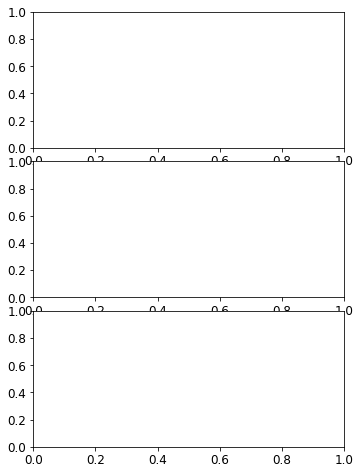

In [368]:
from obiwan.qa import plots

In [367]:
plots.myhist_step?

In [279]:
#dat= fits_table('randoms_rank98.fits')
dat= fits_table('randoms_rank90.fits') # apflux_resid info
len(dat)

Converted unique_id from |S20 to <U20
Converted tractor_brickname from |S4 to <U4
Converted tractor_type from |S4 to <U4


8292

In [280]:
dat.get_columns()

['id',
 'ra',
 'dec',
 'x',
 'y',
 'gflux',
 'mw_transmission_g',
 'rflux',
 'mw_transmission_r',
 'zflux',
 'mw_transmission_z',
 'n',
 'rhalf',
 'e1',
 'e2',
 'unique_id',
 'psql_id',
 'psql_ra',
 'psql_dec',
 'psql_g',
 'psql_r',
 'psql_z',
 'psql_rhalf',
 'psql_n',
 'psql_ba',
 'psql_pa',
 'psql_redshift',
 'tractor_release',
 'tractor_brickid',
 'tractor_brickname',
 'tractor_objid',
 'tractor_brick_primary',
 'tractor_type',
 'tractor_ra',
 'tractor_dec',
 'tractor_ra_ivar',
 'tractor_dec_ivar',
 'tractor_bx',
 'tractor_by',
 'tractor_dchisq',
 'tractor_ebv',
 'tractor_mjd_min',
 'tractor_mjd_max',
 'tractor_flux_u',
 'tractor_flux_g',
 'tractor_flux_r',
 'tractor_flux_i',
 'tractor_flux_z',
 'tractor_flux_y',
 'tractor_flux_ivar_u',
 'tractor_flux_ivar_g',
 'tractor_flux_ivar_r',
 'tractor_flux_ivar_i',
 'tractor_flux_ivar_z',
 'tractor_flux_ivar_y',
 'tractor_apflux_resid_g',
 'tractor_apflux_resid_r',
 'tractor_apflux_resid_z',
 'tractor_mw_transmission_u',
 'tractor_mw_transm

# Input properties (eBOSS)
* ra,dec region
* brightness, shape, size, redshift

#### NGC only 

(14, 34)

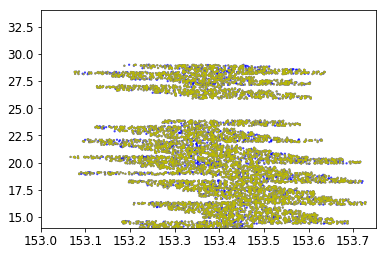

In [369]:
region='ngc'
corners=dict(ngc=dict(ra=(126,168),dec=(14,34)))

fig,ax=plt.subplots()
kw=dict(m='o',s=5.,alpha=0.75)
plots.myscatter(ax,dat.ra,dat.dec, 
                color='b',label='uniform_randoms',**kw)
isRec= dat.obiwan_mask == 1
plots.myscatter(ax,dat.ra[isRec],dat.dec[isRec], 
                color='y',label='uniform_randoms',**kw)
#plt.xlim(corners[region]['ra'])
plt.xlim(153,153.75)
plt.ylim(corners[region]['dec'])


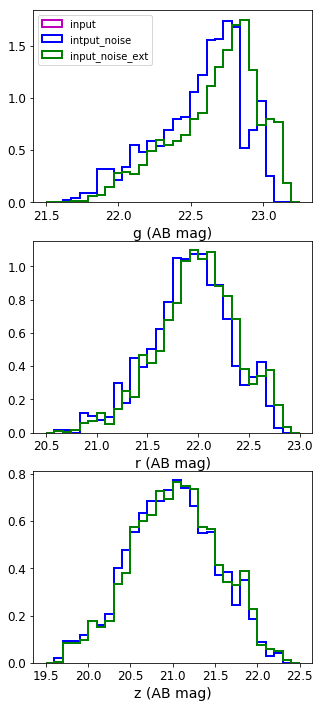

In [387]:
def myhist(ax,data,bins=20,color='b',normed=False,lw=2,ls='solid',label=None,
           range=None):
    kw= dict(bins=bins,color=color,normed=normed,
             histtype='step',range=range,lw=lw,ls=ls)
    if label:
        kw.update(label=label)
    _=ax.hist(data,**kw)

fig,axes=plt.subplots(3,1,figsize=(5,12))
plt.subplots_adjust(hspace=0.2)
xlim= dict(g=(21.5,23.25),
           r=(20.5,23),
           z=(19.5,22.5))
for ax,band in zip(axes,'grz'):
    flux=dict(input_noise_ext= dat.get(band+'flux'),
              intput_noise= dat.get(band+'flux')/\
                          dat.get('mw_transmission_'+band),
              input= plots.mag2flux(dat.get('psql_'+band))
             )
    for key,color in zip(sorted(list(flux.keys()),key=lambda x:len(x)),
                         'mbg'):
        mag= plots.flux2mag(flux[key])
        myhist(ax,mag,bins=30,range=xlim[band],
               color=color,normed=True,label=key)
    ax.set_xlabel('%s (AB mag)' % band)
    
axes[0].legend(loc='upper left')




# How to Fix dflux using apflux_resid!!!!
* the fix makes faint end of the residual have larger scatter than bright end which is what expect

fix= [ 0.46955267 -0.21419707  0.2856611  ...,  0.21198358  0.13909206
 -0.32362264] dflux= [-0.60327875  0.13913705 -0.08202423 ..., -0.05187323 -0.03534078
 -0.02667671]
median= -0.531838792528
fix= [ 0.83753693 -0.44062534  0.81644279 ...,  0.25070146  0.35351264
 -1.73575914] dflux= [-0.60327875  0.13913705 -0.08202423 ..., -0.05187323 -0.03534078
 -0.02667671]
median= -0.44539169405
fix= [ 1.32278228 -0.80876064  1.78851771 ..., -1.24446416 -0.04480623
 -2.68531513] dflux= [-0.60327875  0.13913705 -0.08202423 ..., -0.05187323 -0.03534078
 -0.02667671]
median= -0.179187853022
fix= [ 2.67648363 -1.0258615   0.90383226 ..., -2.88036346  1.83955121
 -4.72889614] dflux= [-0.60327875  0.13913705 -0.08202423 ..., -0.05187323 -0.03534078
 -0.02667671]
median= 0.235969813752
fix= [ 1.99963295 -0.91731107  1.34617499 ..., -2.06241381  0.89737249
 -3.70710564] dflux= [-0.60327875  0.13913705 -0.08202423 ..., -0.05187323 -0.03534078
 -0.02667671]
median= 0.0162609069016


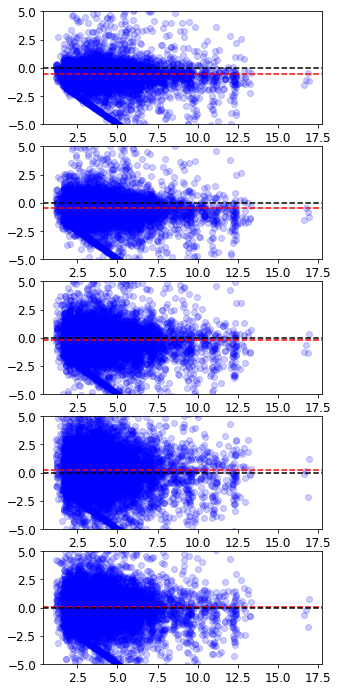

In [334]:
band='z'
figs,ax= plt.subplots(5,1,figsize=(5,12))

isRec= dat.obiwan_mask == 1
dflux= dat.get('tractor_flux_'+band)[isRec] - dat.get(band+'flux')[isRec]
rad_aper= [0.5,0.75,1.0,1.5,2.0,3.5,5.0,7.0]
for cnt,i_aper in enumerate([4,5,6,7,-1]):
    ratio_area= 1. 
    #ratio_area= (1.5*dat.rhalf[isRec] / rad_aper[i_aper])**2
    if i_aper == -1:
        fix= ratio_area * np.average([dat.get('tractor_apflux_resid_'+band)[isRec,6],
                                      dat.get('tractor_apflux_resid_'+band)[isRec,7]],
                                    axis=0)
        assert(len(fix)) == len(dat[isRec])
    else:
        fix= dat.get('tractor_apflux_resid_'+band)[isRec,i_aper]* ratio_area
    print('fix=',fix,'dflux=',dflux)
    y= dflux - fix
    ax[cnt].scatter(dat.get(band+'flux')[isRec],y,
                    alpha=0.2,c='b')
    ax[cnt].axhline(np.median(y),c='r',ls='--')
    print('median=',np.median(y))

for i in range(5):
    ax[i].axhline(0,c='k',ls='--')
#     ax[i].set_yscale('log')
#     ax[i].set_ylim(1e-2,2e1)
    ax[i].set_ylim(-5,5)

### dmag
* True mag: brightness of source + its noise + extinction
* dmag: tractor measured mag - true_mag - sky_mag from sky at that source position

/Users/kaylan1/PhdStudent/Research/desi/obiwan/py/obiwan/qa/plots.py:39: RuntimeWarning: divide by zero encountered in log10
  np.linspace(ylim[0],ylim[1],nbins[1])))
/Users/kaylan1/PhdStudent/Research/desi/obiwan/py/obiwan/qa/plots.py:39: RuntimeWarning: invalid value encountered in log10
  np.linspace(ylim[0],ylim[1],nbins[1])))


true_mag= [ 20.93833542  21.20184135  20.8072052  ...,  21.31015587  21.77809906
  21.01568413] trac_mag= [ 0.29185285 -0.1210452   0.08480629 ...,  0.09607506  0.09786368
 -0.08881957]
median= 0.133546854082
true_mag= [ 20.93833542  21.20184135  20.8072052  ...,  21.31015587  21.77809906
  21.01568413] trac_mag= [ 0.3762652  -0.20637092  0.19661195 ...,  0.10948405  0.20720452
 -0.65323161]
median= 0.10447186237
true_mag= [ 20.93833542  21.20184135  20.8072052  ...,  21.31015587  21.77809906
  21.01568413] trac_mag= [ 0.47840095 -0.3612303   0.37558672 ..., -0.58803373 -0.00557145
 -1.31910432]
median= 0.0395384160801
true_mag= [ 20.93833542  21.20184135  20.8072052  ...,  20.82847595  21.31015587
  21.77809906] trac_mag= [ 0.72108025 -0.4641138   0.21396448 ..., -1.81171733 -5.21707271
  0.76005683]
median= -0.0505317558301
true_mag= [ 20.93833542  21.20184135  20.8072052  ...,  21.31015587  21.77809906
  21.01568413] trac_mag= [ 0.60650687 -0.41145386  0.2977802  ..., -1.32543575  0

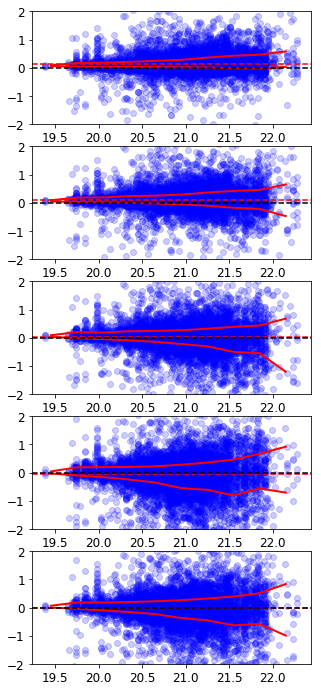

In [340]:
band='z'
figs,ax= plt.subplots(5,1,figsize=(5,12))

isRec= dat.obiwan_mask == 1
rad_aper= [0.5,0.75,1.0,1.5,2.0,3.5,5.0,7.0]
for cnt,i_aper in enumerate([4,5,6,7,-1]):
    ratio_area= 1. 
    #ratio_area= (1.5*dat.rhalf[isRec] / rad_aper[i_aper])**2
    if i_aper == -1:
        fix= ratio_area * np.average([dat.get('tractor_apflux_resid_'+band)[isRec,6],
                                      dat.get('tractor_apflux_resid_'+band)[isRec,7]],
                                    axis=0)
        assert(len(fix)) == len(dat[isRec])
    else:
        fix= dat.get('tractor_apflux_resid_'+band)[isRec,i_aper]* ratio_area
    dmag= plots.flux2mag(dat.get('tractor_flux_'+band)[isRec]) -\
            plots.flux2mag(dat.get(band+'flux')[isRec]+  fix)
    true_mag= plots.flux2mag(dat.get(band+'flux')[isRec]/\
                             dat.get('mw_transmission_'+band)[isRec])
    isPostiveFlux= ((np.isfinite(dmag)) &
                    (np.isfinite(true_mag)))
    print('true_mag=',true_mag[isPostiveFlux],'trac_mag=',dmag[isPostiveFlux])
    ax[cnt].scatter(true_mag[isPostiveFlux],dmag[isPostiveFlux],
                    alpha=0.2,c='b')
    ax[cnt].axhline(np.median(dmag[isPostiveFlux]),c='r',ls='--')
    print('median=',np.median(dmag[isPostiveFlux]))
    
    binned= plots.bin_up(true_mag[isPostiveFlux],dmag[isPostiveFlux], 
                         bin_minmax=(16,25),nbins=30)
    for perc in ['q25','q75']:
        ax[cnt].plot(binned['binc'],binned[perc],c='r',lw=2)

for i in range(5):
    ax[i].axhline(0,c='k',ls='--')
    ax[i].set_ylim(-2,2)

### num std deviations

true_mag= [ 20.93833542  21.20184135  20.8072052  ...,  21.31015587  21.77809906
  21.01568413] num_std_dev= [-4.34730214  1.21810205 -1.3827519  ..., -0.75389706 -0.73209095
  1.21890048]
median= -1.60525274255
true_mag= [ 20.93833542  21.20184135  20.8072052  ...,  21.31015587  21.77809906
  21.01568413] num_std_dev= [-5.8384393   1.99870241 -3.3788592  ..., -0.86452258 -1.63200962
  7.01542316]
median= -1.15402747036
true_mag= [ 20.93833542  21.20184135  20.8072052  ...,  21.31015587  21.77809906
  21.01568413] num_std_dev= [ -7.80473904   3.26783082  -7.03453518 ...,   3.40749519   0.0397263
  10.91315038]
median= -0.151277299666
true_mag= [ 20.93833542  21.20184135  20.8072052  ...,  21.31015587  21.77809906
  21.01568413] num_std_dev= [-13.29017572   4.01627538  -3.70750422 ...,   8.08162013  -7.86888209
  19.30161971]
median= 0.781358373371
true_mag= [ 20.93833542  21.20184135  20.8072052  ...,  21.31015587  21.77809906
  21.01568413] num_std_dev= [-10.54745738   3.6420531   -5.

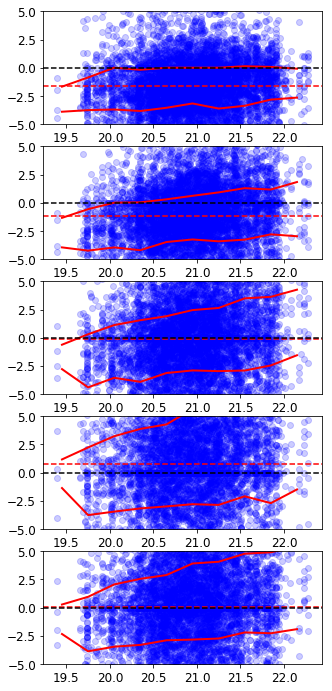

In [338]:
band='z'
figs,ax= plt.subplots(5,1,figsize=(5,12))

isRec= dat.obiwan_mask == 1
rad_aper= [0.5,0.75,1.0,1.5,2.0,3.5,5.0,7.0]
for cnt,i_aper in enumerate([4,5,6,7,-1]):
    ratio_area= 1. 
    #ratio_area= (1.5*dat.rhalf[isRec] / rad_aper[i_aper])**2
    if i_aper == -1:
        fix= ratio_area * np.average([dat.get('tractor_apflux_resid_'+band)[isRec,6],
                                      dat.get('tractor_apflux_resid_'+band)[isRec,7]],
                                    axis=0)
        assert(len(fix)) == len(dat[isRec])
    else:
        fix= dat.get('tractor_apflux_resid_'+band)[isRec,i_aper]* ratio_area
    num_std_dev= (dat.get('tractor_flux_'+band)[isRec] -\
                  (dat.get(band+'flux')[isRec]+  fix))*\
            np.sqrt(dat.get('tractor_flux_ivar_'+band)[isRec])
    true_mag= plots.flux2mag(dat.get(band+'flux')[isRec]/\
                             dat.get('mw_transmission_'+band)[isRec])
    print('true_mag=',true_mag,'num_std_dev=',num_std_dev)
    ax[cnt].scatter(true_mag,num_std_dev,
                    alpha=0.2,c='b')
    ax[cnt].axhline(np.median(num_std_dev),c='r',ls='--')
    print('median=',np.median(num_std_dev))
    
    binned= plots.bin_up(true_mag,num_std_dev, bin_minmax=(16,25),nbins=30)
    for perc in ['q25','q75']:
        ax[cnt].plot(binned['binc'],binned[perc],c='r',lw=2)

for i in range(5):
    ax[i].axhline(0,c='k',ls='--')
    ax[i].set_ylim(-5,5)

### delta RA, Dec

(-0.0001, 0.0001)

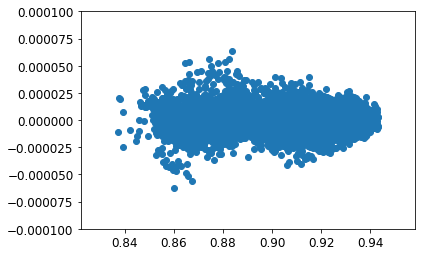

In [281]:
i= dat.obiwan_mask == 1
plt.scatter(dat.mw_transmission_g[i],
            dat.mw_transmission_g[i] - dat.tractor_mw_transmission_g[i])
plt.ylim(-1e-4,1e-4)

(-1.2, 1.2)

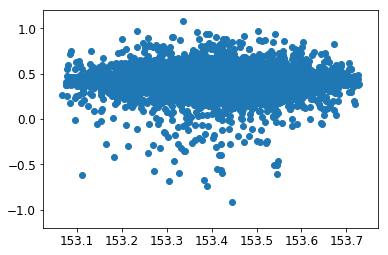

In [282]:
i= dat.obiwan_mask == 1
plt.scatter(dat.ra[i],
            (dat.ra[i] - dat.tractor_ra[i])*3600)
plt.ylim(-1.2,1.2)

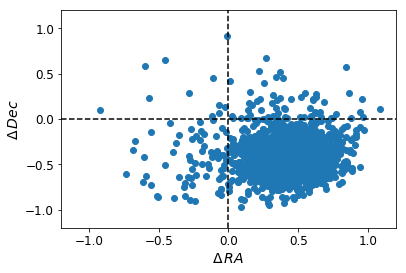

In [283]:
i= dat.obiwan_mask == 1
plt.scatter((dat.ra[i] - dat.tractor_ra[i])*3600,
            (dat.dec[i] - dat.tractor_dec[i])*3600)
plt.axhline(0,c='k',ls='--')
plt.axvline(0,c='k',ls='--')
plt.ylim(-1.2,1.2)
plt.xlim(-1.2,1.2)
plt.xlabel(r'$\Delta \, RA$')
plt.ylabel(r'$\Delta \, Dec$')

In [285]:
i= dat.obiwan_mask == 1
sns.distplot((dat.tractor_nora[i] - dat.tractor_ra[i])*3600,
             (dat.dec[i] - dat.tractor_dec[i])*3600)
plt.axhline(0,c='k',ls='--')
plt.axvline(0,c='k',ls='--')
plt.ylim(-1.2,1.2)
plt.xlim(-1.2,1.2)
plt.xlabel(r'$\Delta \, RA$')
plt.ylabel(r'$\Delta \, Dec$')

AttributeError: 'tabledata' object has no attribute 'tractor_nora'

fix= [ 0.01410908  0.00205612  0.0094271  ...,  0.05565902  0.00697286
  0.00865769] dflux= [-0.17664099  0.04343205 -0.02215747 ..., -0.12600998 -0.06912357
  0.01782683]
fix= [ 0.00511783 -0.00519097  0.01246918 ...,  0.01146335  0.00121295
  0.00036051] dflux= [-0.17664099  0.04343205 -0.02215747 ..., -0.12600998 -0.06912357
  0.01782683]
fix= [ 0.00151087 -0.00555547  0.00538299 ..., -0.02107371  0.00137389
 -0.00986581] dflux= [-0.17664099  0.04343205 -0.02215747 ..., -0.12600998 -0.06912357
  0.01782683]


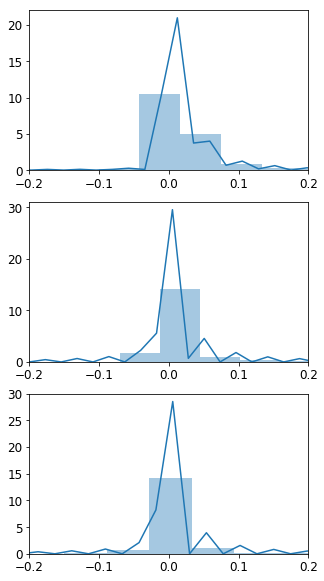

In [298]:
band='g'
figs,ax= plt.subplots(3,1,figsize=(5,10))

isRec= dat.obiwan_mask == 1
dflux= dat.get('tractor_flux_'+band)[isRec] - dat.get(band+'flux')[isRec]
rad_aper= [0.5,0.75,1.0,1.5,2.0,3.5,5.0,7.0]
for cnt,i_aper in enumerate([4,5,6]):
    ratio_area= (1.5*dat.rhalf[isRec] / rad_aper[i_aper])**2
    fix= dat.get('tractor_apflux_resid_'+band)[isRec,i_aper]* ratio_area
    print('fix=',fix,'dflux=',dflux)
    sns.distplot(fix,ax=ax[cnt])
    ax[cnt].set_xlim(-0.2,0.2)
    

### psfsize --> rhalf

In [ ]:
dat.tractor_allmask_g

In [243]:
# recovered
isRec= ((dat.obiwan_mask == 1) &
        (dat.tractor_brick_primary) &
        (dat.tractor_allmask_g == 0) & 
        (dat.tractor_allmask_r == 0) & 
        (dat.tractor_allmask_z == 0) & 
        ((dat.tractor_flux_g > 0) |
         (dat.tractor_flux_r > 0) |
         (dat.tractor_flux_z > 0))
       )
        
# Types
tractor_type= np.char.strip(dat.tractor_type)
TYPES= list(set(tractor_type))
isType={}
for typ in TYPES:
    isType[typ]= tractor_type == typ
print(isType.keys())
# rhalf ~ fwhm/2
fwhm_or_rhalf= np.zeros(len(dat))+np.nan
for typ in TYPES:
    if typ in ['','COMP']:
        continue
    i= (isType[typ]) & (isRec)
    if typ == 'PSF':
        fwhm_or_rhalf[i]= np.mean([dat.get('tractor_psfsize_'+band)[i]
                                   for band in 'grz'],axis=0) / 2
    elif typ == 'SIMP':
        fwhm_or_rhalf[i]= 0.5
    elif typ == 'EXP':
        fwhm_or_rhalf[i]= dat.tractor_shapeexp_r[i]
    elif typ == 'DEV':
        fwhm_or_rhalf[i]= dat.tractor_shapedev_r[i]

dict_keys(['', 'DEV', 'PSF', 'COMP', 'EXP', 'SIMP'])


/Users/kaylan1/miniconda3/envs/mlbook/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  
/Users/kaylan1/miniconda3/envs/mlbook/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


In [244]:
e1= np.zeros(len(dat))+np.nan
e2=e1.copy()
for typ in ['SIMP','EXP','DEV']:
    i= (isType[typ]) & (isRec)
    if typ in ['SIMP','EXP','REX']:
        e1[i]= dat.tractor_shapeexp_e1[i]
        e2[i]= dat.tractor_shapeexp_e2[i]
    elif typ in ['DEV']:
        e1[i]= dat.tractor_shapedev_e1[i]
        e2[i]= dat.tractor_shapedev_e2[i]

## Delta plots

In [255]:
diff={}

for key in ['ra','dec']:
    diff['delta_'+key]= dat.get('tractor_'+key)[isRec] - dat.get(key)[isRec] 
for key in 'xy':
    diff['delta_'+key]= dat.get('tractor_b'+key)[isRec] - dat.get(key)[isRec]
# More complicated quantities
diff['avg_num_std']= np.mean([(dat.get('tractor_flux_'+band)[isRec] - dat.get(band+'flux')[isRec])*\
                                np.sqrt(dat.get('tractor_flux_ivar_'+band)[isRec])
                              for band in 'grz'],axis=0)
diff['fracflux_sum']= np.sum([dat.get('tractor_fracflux_'+band)[isRec]
                              for band in 'grz'],axis=0)
diff['anymask_sum']= np.sum([dat.get('tractor_anymask_'+band)[isRec]
                             for band in 'grz'],axis=0)
diff['allmask_sum']= np.sum([dat.get('tractor_allmask_'+band)[isRec]
                             for band in 'grz'],axis=0)
assert(len(diff['avg_num_std']) == len(dat[isRec]))
for band in 'grz':
    diff[band+'_mag']= plots.flux2mag(dat.get(band+'flux')[isRec]/\
                                      dat.get('mw_transmission_'+band)[isRec])
    

diff['delta_rhalf']= fwhm_or_rhalf[isRec] - dat.rhalf[isRec]
diff['delta_e1']= e1[isRec] - dat.e1[isRec]
diff['delta_e2']= e2[isRec] - dat.e1[isRec]
# Scale
for key in ['ra','dec']:
    diff['delta_'+key]*= 3600 # arcsec
# Add Hue
diff['typ']= tractor_type[isRec]

diff_df= pd.DataFrame(diff)

In [260]:
diff_df.columns

Index(['allmask_sum', 'anymask_sum', 'avg_num_std', 'delta_dec', 'delta_e1',
       'delta_e2', 'delta_ra', 'delta_rhalf', 'delta_x', 'delta_y',
       'fracflux_sum', 'g_mag', 'r_mag', 'typ', 'z_mag'],
      dtype='object')

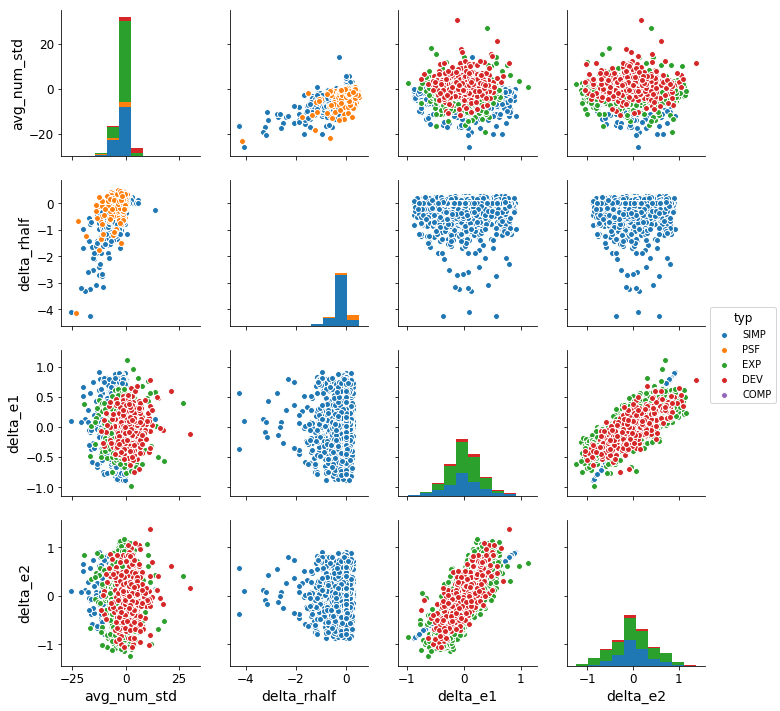

In [189]:
cols=['avg_num_std','delta_rhalf','typ','delta_e1','delta_e2']
sns.pairplot(diff_df[cols], hue="typ")

### Color by exp or dev: dflux/sigma vs. mag, delta_rhalf, e1, e2

In [252]:
set(dat.tractor_fracflux_g[dat.obiwan_mask == 1])

{0.0,
 0.0047294269315898418,
 0.0023323663044720888,
 0.0081588653847575188,
 0.0011112581705674529,
 0.00022863196500111371,
 0.0028280213009566069,
 0.030261635780334473,
 0.0059115500189363956,
 0.0083711715415120125,
 0.025556182488799095,
 0.0027173240669071674,
 0.0037926218938082457,
 0.00010892535647144541,
 0.0012100641615688801,
 0.012101290747523308,
 14.269735336303711,
 2.6745290756225586,
 2.8670837879180908,
 3.1662344932556152,
 3.4293971061706543,
 4.0342559814453125,
 4.6869664192199707,
 4.2039799690246582,
 4.6072125434875488,
 5.1494345664978027,
 0.00043466495117172599,
 0.003186654532328248,
 0.00039661111077293754,
 0.016525644809007645,
 0.0072397477924823761,
 0.046174246817827225,
 0.035119015723466873,
 0.00099933159071952105,
 0.04029545933008194,
 0.0039268843829631805,
 0.05319729819893837,
 0.035980585962533951,
 0.015883620828390121,
 7.1345424652099609,
 7.6121649742126465,
 7.8426203727722168,
 7.5551371574401855,
 7.2274575233459473,
 53.89010620117

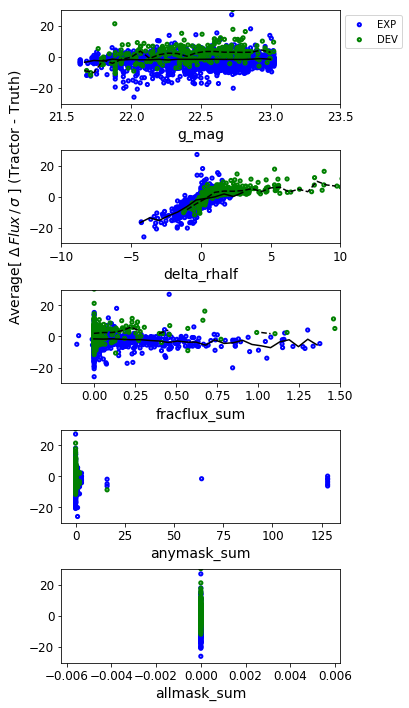

In [263]:
xaxis_band='g'

isEXP= (diff['typ'] == 'EXP') | (diff['typ'] == 'SIMP') 
isDEV= (diff['typ'] == 'DEV')

fig,axes= plt.subplots(5,1,figsize=(5,12))
plt.subplots_adjust(hspace=0.5)
bin_minmax= dict(g_mag=(21.5,23.5),
                 delta_rhalf=(-10,10),
                 delta_e1=(-1,1),
                 delta_e2=(-1,1),
                 fracflux_sum=(-0.2,1.5)
                )
for ax,xkey in zip(axes,
                   ['g_mag','delta_rhalf','fracflux_sum',
                    'anymask_sum','allmask_sum']):
    for keep,label,color,ls in zip([isEXP,isDEV],
                                ['EXP','DEV'],
                                'bg',
                                ['-','--']):
        ax.scatter(diff[xkey][keep],diff['avg_num_std'][keep],
                   edgecolor=color,s=10,c='none',lw=2.,alpha=1,
                   label=label)
        if bin_minmax.get(xkey,None):
            binned= plots.bin_up(diff[xkey][keep],diff['avg_num_std'][keep],
                                 bin_minmax=bin_minmax[xkey],nbins=30)
            for perc in ['q50']: #,'q25','q75']:
                ax.plot(binned['binc'],binned[perc],c='k',ls=ls)
            ax.set_xlim(bin_minmax[xkey])
    ax.set_xlabel(xkey)

for row in range(5):
    axes[row].set_ylim(-30,30)
leg=axes[0].legend(loc='upper left',bbox_to_anchor=(1,1))
axes[1].set_ylabel(r'Average[ $\Delta\, Flux\,/\,\sigma$ ] (Tractor - Truth)')
    

(-10, 10)

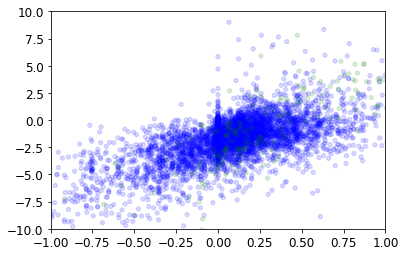

In [269]:
for keep,label,color,ls in zip([isEXP,isDEV],
                            ['EXP','DEV'],
                            'bg',
                            ['-','--']):
    plt.scatter(diff['delta_rhalf'][keep],diff['avg_num_std'][keep],
               edgecolor=color,s=10,c='none',lw=2.,alpha=0.2,
               label=label)
plt.xlim(-1,1)
plt.ylim(-10,10)

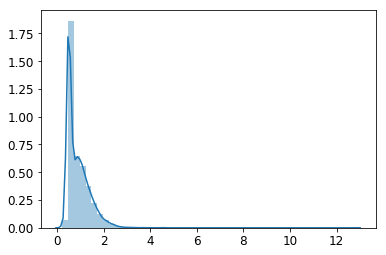

In [271]:
sns.distplot(fwhm_or_rhalf[isRec][isEXP]) # - dat.rhalf[isRec]

(-10, 10)

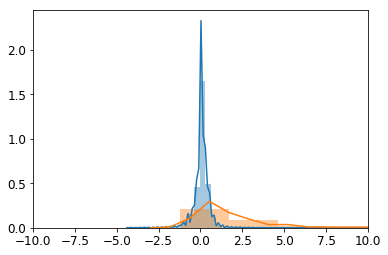

In [247]:
sns.distplot(diff['delta_rhalf'][isEXP])
sns.distplot(diff['delta_rhalf'][isDEV])
plt.xlim(-10,10)

## Compare to straigth truth and measured quanities

In [181]:
d={}

for key in ['ra','dec']:
    d[key]= dat.get(key)[isRec] 
for key in 'xy':
    d[key]= dat.get(key)[isRec]
# More complicated quantities
d['avg_num_std']= np.mean([(dat.get('tractor_flux_'+band)[isRec] - dat.get(band+'flux')[isRec])*\
                             np.sqrt(dat.get('tractor_flux_ivar_'+band)[isRec])
                            for band in 'grz'],axis=0)
assert(len(d['avg_num_std']) == len(dat[isRec]))
#for band in 'grz':
#    diff['num_stddev_'+band]= (dat.get('tractor_flux_'+band)[isRec] - dat.get(band+'flux')[isRec])*\
#                               np.sqrt(dat.get('tractor_flux_ivar_'+band)[isRec])

d['rhalf']= dat.rhalf[isRec]
d['e1']= dat.e1[isRec]
d['e2']= dat.e1[isRec]
# Scale
for key in ['ra','dec']:
    d[key]*= 3600 # arcsec
# Add Hue
d['typ']= tractor_type[isRec]

for key in d.keys():
    if not key in ['avg_num_std']:
        d[key]= np.array(d[key]).byteswap().newbyteorder()

d= pd.DataFrame(d)

In [179]:
d.columns

Index(['avg_num_std', 'dec', 'e1', 'e2', 'ra', 'rhalf', 'typ', 'x', 'y'], dtype='object')

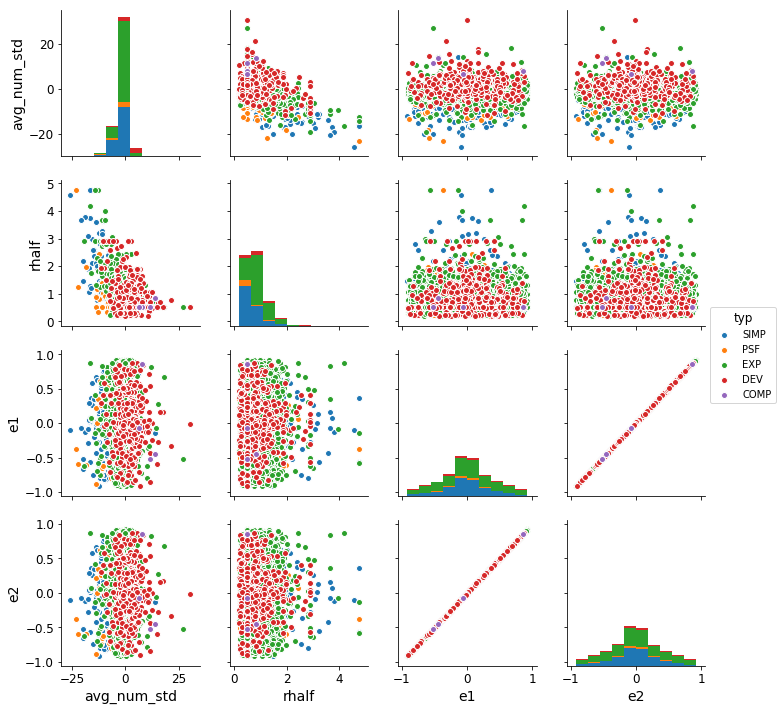

In [182]:
cols=['avg_num_std','rhalf','typ','e1','e2']
sns.pairplot(d[cols], hue="typ")

### delta Flux/err_estim vs. mag, with q25,50,75 lines

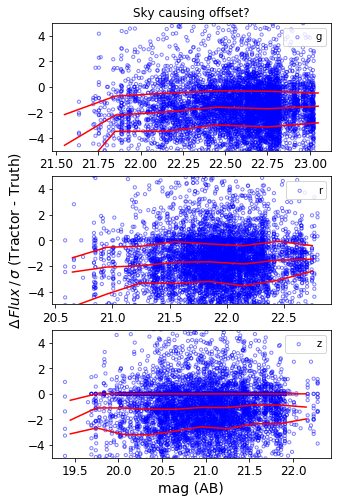

In [70]:
i= dat.obiwan_mask == 1
#truth= plots.flux2mag(dat.gflux[i]/dat.mw_transmission_g[i])
#meas= plots.flux2mag(dat.tractor_flux_g[i]/dat.tractor_mw_transmission_g[i])

fig,ax= plt.subplots(3,1,figsize=(5,8))
plt.subplots_adjust(hspace=0.2)
for iax,band in enumerate('grz'):
    x= plots.flux2mag(dat.get(band+'flux')[i]/\
                      dat.get('mw_transmission_'+band)[i])
    y= (dat.get('tractor_flux_'+band)[i] - dat.get(band+'flux')[i])*\
        np.sqrt(dat.get('tractor_flux_ivar_'+band)[i])
    ax[iax].scatter(x,y,edgecolor='b',
                    s=10,c='none',lw=1.,alpha=0.5,
                    label='%s' % band)
    binned= plots.bin_up(x,y, bin_minmax=(16,25),nbins=30)
    for perc in ['q25','q50','q75']:
        ax[iax].plot(binned['binc'],binned[perc],c='r')

for iax,band in enumerate('grz'):
    ax[iax].legend(loc='upper right')
    ax[iax].set_ylim(-5,5)
ax[1].set_ylabel(r'$\Delta\, Flux\,/\,\sigma$ (Tractor - Truth)')
ax[0].set_title('Sky causing offset?')
ax[2].set_xlabel('mag (AB)')

### delta Flux/err_estim vs. mag for a Single band 4 panels for PSF, SIMP or REX, EXP, COMP

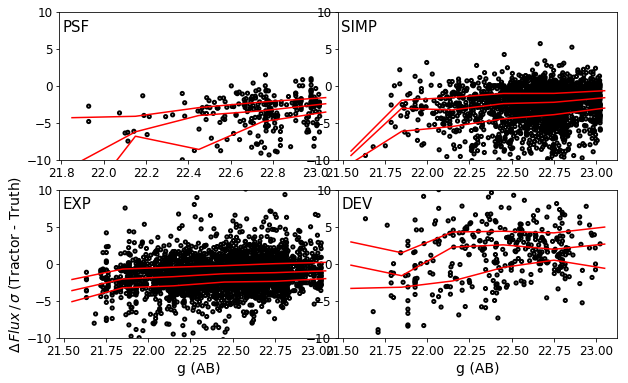

In [110]:
band='g'

isRec= dat.obiwan_mask == 1
# TYPES= 'psf simp exp dev comp rex'.split(' ')
tractor_type= np.char.strip(dat.tractor_type)
# TYPES= set(tractor_type)
# print(TYPES)
TYPES= 'psf simp exp dev'.upper().split(' ')
# print(types)
isType={}
for typ in TYPES:
    isType[typ]= tractor_type == typ
#isType=dict(typ= tractor_type == typ
#            for typ in set(tractor_type))
#truth= plots.flux2mag(dat.gflux[i]/dat.mw_transmission_g[i])
#meas= plots.flux2mag(dat.tractor_flux_g[i]/dat.tractor_mw_transmission_g[i])

fig,ax= plt.subplots(2,2,figsize=(10,6))
plt.subplots_adjust(hspace=0.2,wspace=0)
cnt=-1
for row in range(2):
    for col in range(2):
        cnt+=1
        typ= TYPES[cnt]
        i= (isRec) & (isType[typ])
        if len(dat[i]) > 0:
            x= plots.flux2mag(dat.get(band+'flux')[i]/\
                              dat.get('mw_transmission_'+band)[i])
            y= (dat.get('tractor_flux_'+band)[i] - dat.get(band+'flux')[i])*\
                np.sqrt(dat.get('tractor_flux_ivar_'+band)[i])
            ax[row,col].scatter(x,y,edgecolor='k',
                                s=10,c='none',lw=2.,alpha=1)
            binned= plots.bin_up(x,y, bin_minmax=(16,25),nbins=30)
            for perc in ['q25','q50','q75']:
                ax[row,col].plot(binned['binc'],binned[perc],c='r')
            
            plots.mytext(ax[row,col],0.01,0.9,typ,fontsize=15)
            ax[row,col].set_ylim(-10,10)

#leg=ax[0].legend(loc=(0,1.01),ncol=3,markerscale=3)
ax[1,0].set_ylabel(r'$\Delta\, Flux\,/\,\sigma$ (Tractor - Truth)')
for i in range(2):
    ax[1,i].set_xlabel('%s (AB)' % band)

### q50 filled q25-75 of delta Flux/err_estim vs. mag for each band, 1 panel per PSF, SIMP or REX, EXP, DEV

In [112]:
plt.fill_between?

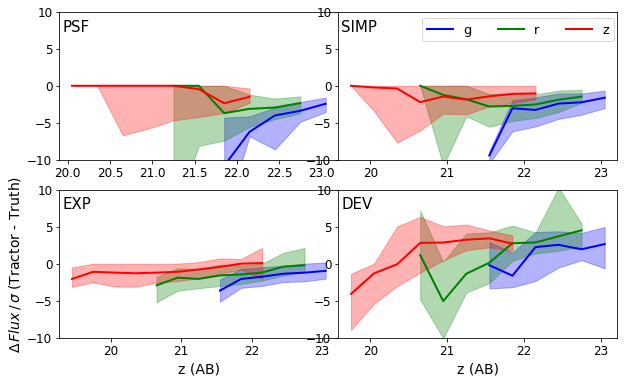

In [119]:
isRec= dat.obiwan_mask == 1
# TYPES= 'psf simp exp dev comp rex'.split(' ')
tractor_type= np.char.strip(dat.tractor_type)
# TYPES= set(tractor_type)
# print(TYPES)
TYPES= 'psf simp exp dev'.upper().split(' ')
# print(types)
isType={}
for typ in TYPES:
    isType[typ]= tractor_type == typ
#isType=dict(typ= tractor_type == typ
#            for typ in set(tractor_type))
#truth= plots.flux2mag(dat.gflux[i]/dat.mw_transmission_g[i])
#meas= plots.flux2mag(dat.tractor_flux_g[i]/dat.tractor_mw_transmission_g[i])

fig,ax= plt.subplots(2,2,figsize=(10,6))
plt.subplots_adjust(hspace=0.2,wspace=0)
cnt=-1
for row in range(2):
    for col in range(2):
        cnt+=1
        typ= TYPES[cnt]
        i= (isRec) & (isType[typ])
        if len(dat[i]) > 0:
            for band,color in zip('grz','bgr'):
                x= plots.flux2mag(dat.get(band+'flux')[i]/\
                                  dat.get('mw_transmission_'+band)[i])
                y= (dat.get('tractor_flux_'+band)[i] - dat.get(band+'flux')[i])*\
                    np.sqrt(dat.get('tractor_flux_ivar_'+band)[i])
    #             ax[row,col].scatter(x,y,edgecolor='k',
    #                                 s=10,c='none',lw=2.,alpha=1)
                binned= plots.bin_up(x,y, bin_minmax=(16,25),nbins=30)
                ax[row,col].plot(binned['binc'],binned['q50'],c=color,
                                 lw=2,label=band)
                ax[row,col].fill_between(binned['binc'],
                                         binned['q25'],binned['q75'],
                                         color=color,alpha=0.3)

            plots.mytext(ax[row,col],0.01,0.9,typ,fontsize=15)
            ax[row,col].set_ylim(-10,10)

leg=ax[0,1].legend(loc=(0.3,0.8),ncol=3,fontsize=13)
ax[1,0].set_ylabel(r'$\Delta\, Flux\,/\,\sigma$ (Tractor - Truth)')
for i in range(2):
    ax[1,i].set_xlabel('%s (AB)' % band)

### delta Flux/err_estim vs. mag but ADD for all three bands, so if tractor wrong by 2 std dev in all bands would have a +6 on the plot, one panel for each PSF, SIMP or REX, EXP, COMP

### have to choose band to plot mag of on the xaxis

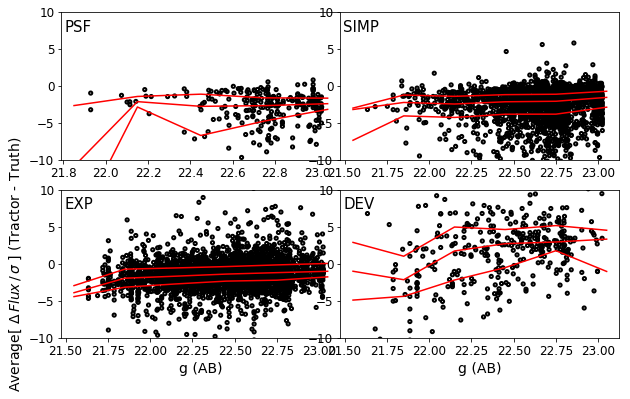

In [126]:
xaxis_band='g'

isRec= dat.obiwan_mask == 1
# TYPES= 'psf simp exp dev comp rex'.split(' ')
tractor_type= np.char.strip(dat.tractor_type)
# TYPES= set(tractor_type)
# print(TYPES)
TYPES= 'psf simp exp dev'.upper().split(' ')
# print(types)
isType={}
for typ in TYPES:
    isType[typ]= tractor_type == typ
#isType=dict(typ= tractor_type == typ
#            for typ in set(tractor_type))
#truth= plots.flux2mag(dat.gflux[i]/dat.mw_transmission_g[i])
#meas= plots.flux2mag(dat.tractor_flux_g[i]/dat.tractor_mw_transmission_g[i])

fig,ax= plt.subplots(2,2,figsize=(10,6))
plt.subplots_adjust(hspace=0.2,wspace=0)
cnt=-1
for row in range(2):
    for col in range(2):
        cnt+=1
        typ= TYPES[cnt]
        i= (isRec) & (isType[typ])
        if len(dat[i]) > 0:
            x= plots.flux2mag(dat.get(xaxis_band+'flux')[i]/\
                                      dat.get('mw_transmission_'+xaxis_band)[i])
            y= np.mean([(dat.get('tractor_flux_'+band)[i] - dat.get(band+'flux')[i])*\
                         np.sqrt(dat.get('tractor_flux_ivar_'+band)[i])
                        for band in 'grz'],axis=0)
            assert(len(y) == len(dat[i]))
            ax[row,col].scatter(x,y,edgecolor='k',
                                s=10,c='none',lw=2.,alpha=1)
            binned= plots.bin_up(x,y, bin_minmax=(16,25),nbins=30)
            for perc in ['q25','q50','q75']:
                ax[row,col].plot(binned['binc'],binned[perc],c='r')
            
            plots.mytext(ax[row,col],0.01,0.9,typ,fontsize=15)
            ax[row,col].set_ylim(-10,10)

#leg=ax[0].legend(loc=(0,1.01),ncol=3,markerscale=3)
ax[1,0].set_ylabel(r'Average[ $\Delta\, Flux\,/\,\sigma$ ] (Tractor - Truth)')
for i in range(2):
    ax[1,i].set_xlabel('%s (AB)' % xaxis_band)

### Ditto above except draw median lines for all TYPES on same panel, and different panel for xaxis_band  in grz

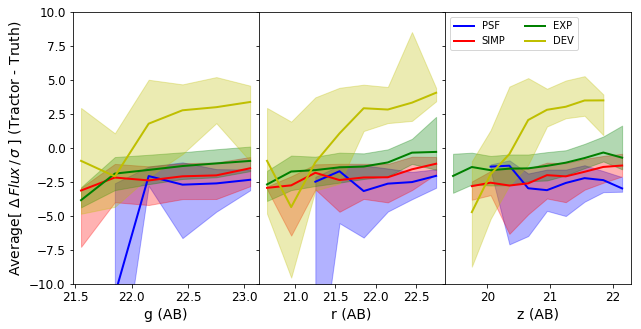

In [132]:
isRec= dat.obiwan_mask == 1
# TYPES= 'psf simp exp dev comp rex'.split(' ')
tractor_type= np.char.strip(dat.tractor_type)
# TYPES= set(tractor_type)
# print(TYPES)
TYPES= 'psf simp exp dev'.upper().split(' ')
# print(types)
isType={}
for typ in TYPES:
    isType[typ]= tractor_type == typ
#isType=dict(typ= tractor_type == typ
#            for typ in set(tractor_type))
#truth= plots.flux2mag(dat.gflux[i]/dat.mw_transmission_g[i])
#meas= plots.flux2mag(dat.tractor_flux_g[i]/dat.tractor_mw_transmission_g[i])

fig,axes= plt.subplots(1,3,figsize=(10,5))
plt.subplots_adjust(wspace=0)
cnt=-1
for ax,xaxis_band in zip(axes,'grz'):
    for typ,color in zip(TYPES,'brgy'):
        i= (isRec) & (isType[typ])
        if len(dat[i]) > 0:
            x= plots.flux2mag(dat.get(xaxis_band+'flux')[i]/\
                                      dat.get('mw_transmission_'+xaxis_band)[i])
            y= np.mean([(dat.get('tractor_flux_'+band)[i] - dat.get(band+'flux')[i])*\
                         np.sqrt(dat.get('tractor_flux_ivar_'+band)[i])
                        for band in 'grz'],axis=0)
            assert(len(y) == len(dat[i]))
            
            binned= plots.bin_up(x,y, bin_minmax=(16,25),nbins=30)
            ax.plot(binned['binc'],binned['q50'],c=color,
                    lw=2,label=typ)
            ax.fill_between(binned['binc'],
                            binned['q25'],binned['q75'],
                            color=color,alpha=0.3)
            
    #plots.mytext(ax,0.01,0.9,typ,fontsize=15)
    ax.set_ylim(-10,10)
    ax.set_xlabel('%s (AB)' % xaxis_band)

leg=axes[-1].legend(loc='upper left',ncol=2)
axes[0].set_ylabel(r'Average[ $\Delta\, Flux\,/\,\sigma$ ] (Tractor - Truth)')
for i in [1,2]:
    axes[i].set_yticklabels([])

In [121]:
np.mean([np.arange(10) for i in range(3)],axis=0)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])